# Hofstadter model

#### Note: the following code is edited to include ent_spectrum

In [1]:
import numpy as np
import random

from tenpy.algorithms import dmrg
from tenpy.networks.mps import MPS

from tenpy.models.model import CouplingMPOModel
from tenpy.networks.site import BosonSite, FermionSite
from tenpy.models.lattice import Square
from tenpy.models.hofstadter import HofstadterBosons

import logging
logging.basicConfig(level=logging.INFO)

#M: Added ent_spectrum
data8 = dict(phi_ext=np.linspace(0, 2.0, 21), QL=[], ent_spectrum=[])

#M: Did not change anything after this except the very last line
model_params = dict(Lx=4, Ly=4,
                    # mx=,2 my=1,
                    filling=(1, 8), phi=(1, 4),
                    Jx=1, Jy=1, mu=0, U=0, Nmax=1,
                    bc_MPS='infinite', bc_x='periodic', bc_y='cylinder',
                    conserve='N', order='default', gauge='landau_x')


dmrg_params = {
    'mixer': True,  # setting this to True helps to escape local minima
    'mixer_params': {
        'amplitude': 1.e-5,
        'decay': 1.2,
        'disable_after': 30
    },
    'trunc_params': {
        'chi_max': 50,
        'svd_min': 1.e-10,
    },
    'max_E_err': 1.e-8,
    'max_S_err': 1.e-6,
    'max_sweeps': 150,
    'verbose': 1,
    'combine': True
}

# prod_state = [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
L = model_params['Lx'] * model_params['Ly']
fill = model_params['filling'][0] / model_params['filling'][1]
prod_state = np.zeros(L, dtype=int)
prod_state[random.sample(range(L), int(fill*L))] = 1
print(prod_state)

eng = None
QLs = []
for phi in np.linspace(0, 2.0, 21):

    model_params['phi_ext'] = phi *2 * np.pi
    M = HofstadterBosons(model_params)

    if eng is None:  # first time in the loop
        psi = MPS.from_product_state(M.lat.mps_sites(), prod_state, bc=M.lat.bc_MPS)
        eng = dmrg.TwoSiteDMRGEngine(psi, M, dmrg_params)
    else:
        dmrg_params['mixer'] = False
        eng.init_env(model=M)  # re-initialize
    E, psi = eng.run()
    QL = psi.average_charge(bond=0)[0]
    data8['QL'].append(QL)
    data8['ent_spectrum'].append(psi.entanglement_spectrum(by_charge=True)[0])
    
    

[0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
Reading 'bc_MPS'='infinite' for config HofstadterBosons
Reading 'order'='default' for config HofstadterBosons
Reading 'Nmax'=1 for config HofstadterBosons
Reading 'conserve'='N' for config HofstadterBosons
Reading 'filling'=(1, 8) for config HofstadterBosons
Reading 'Lx'=4 for config HofstadterBosons
Reading 'Ly'=4 for config HofstadterBosons
Reading 'bc_x'='periodic' for config HofstadterBosons
Reading 'bc_y'='cylinder' for config HofstadterBosons
Reading 'phi_ext'=0.0 for config HofstadterBosons
Reading 'mu'=0 for config HofstadterBosons
Reading 'U'=0 for config HofstadterBosons
Reading 'gauge'='landau_x' for config HofstadterBosons
Reading 'Jx'=1 for config HofstadterBosons
Reading 'Jy'=1 for config HofstadterBosons
Reading 'phi'=(1, 4) for config HofstadterBosons
Reading 'combine'=True for config TwoSiteDMRGEngine
Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Updating environment
.
Readi

/Users/mathiraja/TeNPy/tenpy/networks/mps.py:2771: RuntimeWarning: divide by zero encountered in reciprocal
  S = S**form_diff


Updating environment
.....
sweep 10, age = 528
Energy = -0.3467306407670252, S = nan, norm_err = 1.4e-07
Current memory usage 129856.0 MB, time elapsed: 12.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5656e-07, max_E_trunc = 4.5897e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 1008
Energy = -0.3467309910969920, S = nan, norm_err = 7.4e-08
Current memory usage 131104.0 MB, time elapsed: 21.7 s
Delta E = -3.5033e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.0541e-08, max_E_trunc = 3.0463e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
disable mixer after 30 sweeps, final amplitude 4.21e-08
Updating environment
.....
sweep 30, age = 1488
Energy = -0.3467311516985667, S = 0.6604027763062167, norm_err = 7.3e-14
Current memory usage 133728.0 MB, time elapsed: 28.7 s
Delta E = -1.6060e-08, Delta S = nan (per sweep)
max_trunc_err = 

/Users/mathiraja/TeNPy/tenpy/networks/mps.py:2771: RuntimeWarning: divide by zero encountered in reciprocal
  S = S**form_diff


Updating environment
.....
sweep 20, age = 2960
Energy = -0.3456201812207169, S = 0.6730781841886797, norm_err = 2.1e-14
Current memory usage 136160.0 MB, time elapsed: 7.2 s
Delta E = -1.4683e-11, Delta S = -6.4574e-09 (per sweep)
max_trunc_err = 4.3359e-08, max_E_trunc = 3.0535e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 2960, maximum chi = 50
Reading 'explicit_plus_hc'=False for config HofstadterBosons
Reading 'bc_MPS'='infinite' for config HofstadterBosons
Reading 'order'='default' for config HofstadterBosons
Reading 'Nmax'=1 for config HofstadterBosons
Reading 'conserve'='N' for config HofstadterBosons
Reading 'filling'=(1, 8) for config HofstadterBosons
Reading 'Lx'=4 for config HofstadterBosons
Reading 'Ly'=4 for config HofstadterBosons
Reading 'bc_x'='periodic' for config HofstadterBosons
Reading 'bc_y'='cylinder' for config HofstadterBosons
Reading 'phi_ext'=1.2566370614359172 for config 

.
Updating environment
.....
sweep 10, age = 6448
Energy = -0.3345528723816216, S = 0.8379702693957749, norm_err = 1.3e-12
Current memory usage 136672.0 MB, time elapsed: 3.8 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 1.8027e-07, max_E_trunc = 1.1865e-06
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 6928
Energy = -0.3345528725732123, S = 0.8379691010686062, norm_err = 1.6e-12
Current memory usage 136720.0 MB, time elapsed: 6.9 s
Delta E = -1.9159e-11, Delta S = -1.1683e-07 (per sweep)
max_trunc_err = 1.7911e-07, max_E_trunc = 1.1859e-06
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 6928, maximum chi = 50
Reading 'explicit_plus_hc'=False for config HofstadterBosons
Reading 'bc_MPS'='infinite' for config HofstadterBosons
Reading 'order'='default' for config HofstadterBosons
Reading 'Nmax'=1 for config Hofsta

/Users/mathiraja/TeNPy/tenpy/networks/mps.py:2771: RuntimeWarning: divide by zero encountered in reciprocal
  S = S**form_diff


Updating environment
.....
sweep 10, age = 7440
Energy = -0.3357567953884200, S = 0.8161560454546662, norm_err = 1.2e-12
Current memory usage 136720.0 MB, time elapsed: 4.2 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 1.6042e-07, max_E_trunc = 1.0811e-06
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 7920
Energy = -0.3357567953433005, S = 0.8161561766104156, norm_err = 1.2e-12
Current memory usage 136720.0 MB, time elapsed: 7.8 s
Delta E = 4.5119e-12, Delta S = 1.3116e-08 (per sweep)
max_trunc_err = 1.6026e-07, max_E_trunc = 1.0800e-06
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 7920, maximum chi = 50
Reading 'explicit_plus_hc'=False for config HofstadterBosons
Reading 'bc_MPS'='infinite' for config HofstadterBosons
Reading 'order'='default' for config HofstadterBosons
Reading 'Nmax'=1 for config Hofstadter

/Users/mathiraja/TeNPy/tenpy/networks/mps.py:2771: RuntimeWarning: divide by zero encountered in reciprocal
  S = S**form_diff


Updating environment
.....
sweep 20, age = 10896
Energy = -0.3456201806935297, S = 0.6730751180997311, norm_err = 3.0e-14
Current memory usage 136832.0 MB, time elapsed: 7.5 s
Delta E = -4.0501e-13, Delta S = 1.6959e-08 (per sweep)
max_trunc_err = 4.1980e-08, max_E_trunc = 3.0259e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 10896, maximum chi = 50
Reading 'explicit_plus_hc'=False for config HofstadterBosons
Reading 'bc_MPS'='infinite' for config HofstadterBosons
Reading 'order'='default' for config HofstadterBosons
Reading 'Nmax'=1 for config HofstadterBosons
Reading 'conserve'='N' for config HofstadterBosons
Reading 'filling'=(1, 8) for config HofstadterBosons
Reading 'Lx'=4 for config HofstadterBosons
Reading 'Ly'=4 for config HofstadterBosons
Reading 'bc_x'='periodic' for config HofstadterBosons
Reading 'bc_y'='cylinder' for config HofstadterBosons
Reading 'phi_ext'=6.283185307179586 for config 

/Users/mathiraja/TeNPy/tenpy/networks/mps.py:2771: RuntimeWarning: divide by zero encountered in reciprocal
  S = S**form_diff


Updating environment
.....
sweep 10, age = 11408
Energy = -0.3467311629932794, S = 0.6604054178645333, norm_err = 2.7e-14
Current memory usage 136864.0 MB, time elapsed: 3.7 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 3.5078e-08, max_E_trunc = 2.4333e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 11888
Energy = -0.3467311629888457, S = 0.6604055826835455, norm_err = 2.8e-14
Current memory usage 136864.0 MB, time elapsed: 6.7 s
Delta E = 4.4338e-13, Delta S = 1.6482e-08 (per sweep)
max_trunc_err = 3.5060e-08, max_E_trunc = 2.4282e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 11888, maximum chi = 50
Reading 'explicit_plus_hc'=False for config HofstadterBosons
Reading 'bc_MPS'='infinite' for config HofstadterBosons
Reading 'order'='default' for config HofstadterBosons
Reading 'Nmax'=1 for config Hofstad

Reading 'sort_mpo_legs'=False for config HofstadterBosons
Initial sweeps...
Updating environment
.
Updating environment
.....
sweep 10, age = 15376
Energy = -0.3357567818023313, S = 0.8161645551950294, norm_err = 9.8e-13
Current memory usage 138192.0 MB, time elapsed: 4.4 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 1.8029e-07, max_E_trunc = 1.1722e-06
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 15856
Energy = -0.3357567837897193, S = 0.8161617564734396, norm_err = 5.5e-13
Current memory usage 138384.0 MB, time elapsed: 7.9 s
Delta E = -1.9874e-10, Delta S = -2.7987e-07 (per sweep)
max_trunc_err = 1.7999e-07, max_E_trunc = 1.1704e-06
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 15856, maximum chi = 50
Reading 'explicit_plus_hc'=False for config HofstadterBosons
Reading 'bc_MPS'='infinite' for config Hofst

/Users/mathiraja/TeNPy/tenpy/networks/mps.py:2771: RuntimeWarning: divide by zero encountered in reciprocal
  S = S**form_diff


Updating environment
.....
sweep 20, age = 18832
Energy = -0.3388796463210895, S = 0.7642643126374166, norm_err = 6.8e-13
Current memory usage 138464.0 MB, time elapsed: 7.8 s
Delta E = 8.3645e-12, Delta S = 3.6725e-08 (per sweep)
max_trunc_err = 1.0894e-07, max_E_trunc = 7.3522e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 18832, maximum chi = 50
Reading 'explicit_plus_hc'=False for config HofstadterBosons
Reading 'bc_MPS'='infinite' for config HofstadterBosons
Reading 'order'='default' for config HofstadterBosons
Reading 'Nmax'=1 for config HofstadterBosons
Reading 'conserve'='N' for config HofstadterBosons
Reading 'filling'=(1, 8) for config HofstadterBosons
Reading 'Lx'=4 for config HofstadterBosons
Reading 'Ly'=4 for config HofstadterBosons
Reading 'bc_x'='periodic' for config HofstadterBosons
Reading 'bc_y'='cylinder' for config HofstadterBosons
Reading 'phi_ext'=11.309733552923255 for config 

Then we can plot the charge pumping to find $1$ charge pumped after $2$ flux insertions, which corresponds to Hall conductivity of $\sigma_H = e/h C \nu = e/2h$. Due to the lower Hilbert space dimension, running the density matrix renormalization group simulation for bosons is significantly faster than for fermions.

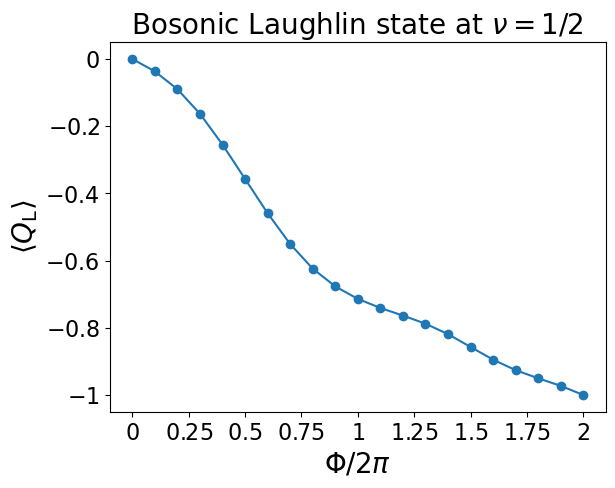

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.plot(data8['phi_ext'], data8['QL']-data8['QL'][0], marker='o')
ax.set_xlabel(r"$\Phi / 2 \pi$", fontsize=20)
ax.set_ylabel(r"$ \langle Q_\mathrm{L} \rangle $", fontsize=20)
ax.set_title(r"Bosonic Laughlin state at $\nu=1/2$", fontsize=20)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
#ax.set_xlim([0, 2])
plt.show()

Plot of spectral flow:

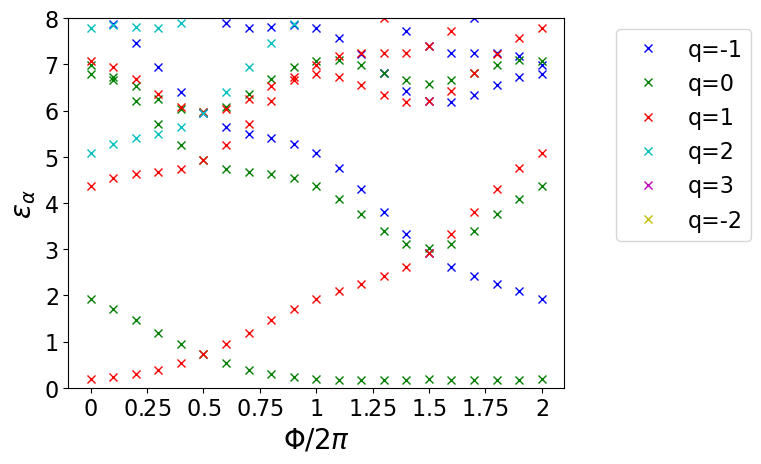

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
color_by_charge = {}
for phi_ext, spectrum in zip(data8['phi_ext'], data8['ent_spectrum']):
    for q, s in spectrum:
        if q > -4:
            q = q[0]
            label = ""
            if q not in color_by_charge:
                label = "q={q:d}".format(q=q)
                color_by_charge[q] = colors[len(color_by_charge) % len(colors)]
            color = color_by_charge[q]
            ax.plot(phi_ext*np.ones(s.shape), s,
                    linestyle='', marker='x', color=color, label=label)
ax.set_xlabel(r"$\Phi / 2 \pi$", fontsize=20)
ax.set_ylabel(r"$ \epsilon_\alpha $", fontsize=20)
ax.set_ylim(0., 8.)
ax.legend(loc='upper right', fontsize=16, bbox_to_anchor=(1.4, 1))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
#ax.set_xlim([0, 2])
plt.show()

We can now try the same computation but for fermions with nearest-neighbor interactions and $V=10$. Just like for the Haldane model, we fill a $C=1$ band up to $\nu=1/3$. We use a bond dimension of $\chi=50$.

WARNING: The following cell may take several minutes to run.

In [5]:
import numpy as np

from tenpy.algorithms import dmrg
from tenpy.networks.mps import MPS
from tenpy.models.hofstadter import HofstadterFermions

data9 = dict(phi_ext=np.linspace(0, 3.0, 31), QL=[], ent_spectrum=[]) #M: Added ent_spectrum

model_params = dict(Lx=3, Ly=6,
                    mx=3, my=1,
                    filling=(1, 9), phi=(1, 3),
                    Jx=1, Jy=1, mu=0, v=10,
                    bc_MPS='infinite', bc_x='periodic', bc_y='cylinder',
                    conserve='N', order='default', gauge='landau_x')

dmrg_params = {
    'mixer': True,  # setting this to True helps to escape local minima
    'mixer_params': {
        'amplitude': 1.e-5,
        'decay': 1.2,
        'disable_after': 30
    },
    'trunc_params': {
        'chi_max': 50,
        'svd_min': 1.e-10,
    },
    'max_E_err': 1.e-8,
    'max_S_err': 1.e-6,
    'max_sweeps': 150,
    'verbose': 1,
    'combine': True
}

prod_state = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

eng = None
QLs = []
for phi in np.linspace(0, 3.0, 31):

    model_params['phi_ext'] = phi * 2 * np.pi

    if eng is None:  # first time in the loop
        M = HofstadterFermions(model_params)
        psi = MPS.from_product_state(M.lat.mps_sites(), prod_state, bc=M.lat.bc_MPS)
        eng = dmrg.TwoSiteDMRGEngine(psi, M, dmrg_params)
    else:
        dmrg_params['mixer'] = False
        M = HofstadterFermions(model_params)
        eng.init_env(model=M)

    E, psi = eng.run()

    QL = psi.average_charge(bond=0)[0]
    data9['QL'].append(QL)
    data9['ent_spectrum'].append(psi.entanglement_spectrum(by_charge=True)[0])

Reading 'bc_MPS'='infinite' for config HofstadterFermions
Reading 'order'='default' for config HofstadterFermions
Reading 'conserve'='N' for config HofstadterFermions
Reading 'filling'=(1, 9) for config HofstadterFermions
Reading 'Lx'=3 for config HofstadterFermions
Reading 'Ly'=6 for config HofstadterFermions
Reading 'bc_x'='periodic' for config HofstadterFermions
Reading 'bc_y'='cylinder' for config HofstadterFermions
Reading 'phi_ext'=0.0 for config HofstadterFermions
Reading 'mu'=0 for config HofstadterFermions
Reading 'v'=10 for config HofstadterFermions
Reading 'gauge'='landau_x' for config HofstadterFermions
Reading 'mx'=3 for config HofstadterFermions
Reading 'my'=1 for config HofstadterFermions
Reading 'Jx'=1 for config HofstadterFermions
Reading 'Jy'=1 for config HofstadterFermions
Reading 'phi'=(1, 3) for config HofstadterFermions
Reading 'combine'=True for config TwoSiteDMRGEngine
Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Init

/Users/mathiraja/TeNPy/tenpy/networks/mps.py:2771: RuntimeWarning: divide by zero encountered in reciprocal
  S = S**form_diff


Reading 'max_sweeps'=150 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-08 for config TwoSiteDMRGEngine
Reading 'max_S_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 594
Energy = -0.2688605400425846, S = nan, norm_err = 1.7e-05
Current memory usage 220672.0 MB, time elapsed: 1327.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0130e-05, max_E_trunc = 1.4278e-04
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 1134
Energy = -0.2689061856114894, S = nan, norm_err = 4.9e-06
Current memory usage 220672.0 MB, time elapsed: 1355.0 s
Delta E = -4.5646e-06, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3097e-05, max_E_trunc = 1.2331e-04
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 5

.
Updating environment
.....
sweep 10, age = 5562
Energy = -0.2689620846279139, S = 1.2650556158929820, norm_err = 3.3e-09
Current memory usage 226960.0 MB, time elapsed: 26.2 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 9.0998e-06, max_E_trunc = 9.4743e-05
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 6102
Energy = -0.2689620046171260, S = 1.2650739375909561, norm_err = 3.2e-09
Current memory usage 227088.0 MB, time elapsed: 47.8 s
Delta E = 8.0011e-09, Delta S = 1.8322e-06 (per sweep)
max_trunc_err = 9.1158e-06, max_E_trunc = 9.4826e-05
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 30, age = 6642
Energy = -0.2689620007372216, S = 1.2650760089375612, norm_err = 3.2e-09
Current memory usage 227088.0 MB, time elapsed: 68.5 s
Delta E = 3.8799e-10, Delta S = 2.0713e-07 (per sweep)
max_trunc_err = 9.1146e-0

Updating environment
....

/Users/mathiraja/TeNPy/tenpy/networks/mps.py:2771: RuntimeWarning: divide by zero encountered in reciprocal
  S = S**form_diff


.
sweep 30, age = 11070
Energy = -0.2691109029344337, S = 1.2160139075138732, norm_err = 1.0e-09
Current memory usage 227152.0 MB, time elapsed: 65.9 s
Delta E = 1.0988e-09, Delta S = 3.3826e-07 (per sweep)
max_trunc_err = 7.9966e-06, max_E_trunc = 8.6112e-05
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 30 sweeps.
total size = 11070, maximum chi = 50
Reading 'explicit_plus_hc'=False for config HofstadterFermions
Reading 'bc_MPS'='infinite' for config HofstadterFermions
Reading 'order'='default' for config HofstadterFermions
Reading 'conserve'='N' for config HofstadterFermions
Reading 'filling'=(1, 9) for config HofstadterFermions
Reading 'Lx'=3 for config HofstadterFermions
Reading 'Ly'=6 for config HofstadterFermions
Reading 'bc_x'='periodic' for config HofstadterFermions
Reading 'bc_y'='cylinder' for config HofstadterFermions
Reading 'phi_ext'=4.39822971502571 for config HofstadterFermions
Reading 'mu'=0 for config 

.
Updating environment
.....
sweep 10, age = 16074
Energy = -0.2689060287077862, S = 1.3586708450257858, norm_err = 8.2e-09
Current memory usage 227184.0 MB, time elapsed: 26.7 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 1.1571e-05, max_E_trunc = 1.2212e-04
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 16614
Energy = -0.2689060619787951, S = 1.3586564427134604, norm_err = 8.3e-09
Current memory usage 227184.0 MB, time elapsed: 45.1 s
Delta E = -3.3271e-09, Delta S = -1.4402e-06 (per sweep)
max_trunc_err = 1.1557e-05, max_E_trunc = 1.2095e-04
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 30, age = 17154
Energy = -0.2689060570866736, S = 1.3586500928049896, norm_err = 8.4e-09
Current memory usage 227184.0 MB, time elapsed: 64.3 s
Delta E = 4.8921e-10, Delta S = -6.3499e-07 (per sweep)
max_trunc_err = 1.1

/Users/mathiraja/TeNPy/tenpy/networks/mps.py:2771: RuntimeWarning: divide by zero encountered in reciprocal
  S = S**form_diff


...
sweep 10, age = 17730
Energy = -0.2688849289299924, S = 1.3484234142860210, norm_err = 1.4e-08
Current memory usage 227184.0 MB, time elapsed: 23.3 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 1.1058e-05, max_E_trunc = 1.1026e-04
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 18270
Energy = -0.2688849383649894, S = 1.3484263311895393, norm_err = 1.4e-08
Current memory usage 227184.0 MB, time elapsed: 41.7 s
Delta E = -9.4350e-10, Delta S = 2.9169e-07 (per sweep)
max_trunc_err = 1.1194e-05, max_E_trunc = 1.1231e-04
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 18270, maximum chi = 50
Reading 'explicit_plus_hc'=False for config HofstadterFermions
Reading 'bc_MPS'='infinite' for config HofstadterFermions
Reading 'order'='default' for config HofstadterFermions
Reading 'conserve'='N' for config

/Users/mathiraja/TeNPy/tenpy/networks/mps.py:2771: RuntimeWarning: divide by zero encountered in reciprocal
  S = S**form_diff


Updating environment
.....
sweep 30, age = 22698
Energy = -0.2691133039274468, S = 1.2165497879882221, norm_err = 2.3e-09
Current memory usage 227216.0 MB, time elapsed: 59.7 s
Delta E = -1.0355e-09, Delta S = -2.7599e-06 (per sweep)
max_trunc_err = 7.9336e-06, max_E_trunc = 8.3127e-05
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 40, age = 23238
Energy = -0.2691132978039200, S = 1.2165455933604914, norm_err = 2.4e-09
Current memory usage 227216.0 MB, time elapsed: 78.4 s
Delta E = 6.1235e-10, Delta S = -4.1946e-07 (per sweep)
max_trunc_err = 7.9352e-06, max_E_trunc = 8.3136e-05
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 40 sweeps.
total size = 23238, maximum chi = 50
Reading 'explicit_plus_hc'=False for config HofstadterFermions
Reading 'bc_MPS'='infinite' for config HofstadterFermions
Reading 'order'='default' for config HofstadterFer

/Users/mathiraja/TeNPy/tenpy/networks/mps.py:2771: RuntimeWarning: divide by zero encountered in reciprocal
  S = S**form_diff


Updating environment
.....
sweep 20, age = 27666
Energy = -0.2689615426217592, S = 1.2647391240575978, norm_err = 3.3e-09
Current memory usage 227264.0 MB, time elapsed: 54.5 s
Delta E = -2.3649e-08, Delta S = 1.0053e-05 (per sweep)
max_trunc_err = 8.7964e-06, max_E_trunc = 9.2215e-05
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 30, age = 28206
Energy = -0.2689615316346085, S = 1.2647457375746731, norm_err = 3.4e-09
Current memory usage 227264.0 MB, time elapsed: 73.4 s
Delta E = 1.0987e-09, Delta S = 6.6135e-07 (per sweep)
max_trunc_err = 8.8492e-06, max_E_trunc = 9.2021e-05
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 30 sweeps.
total size = 28206, maximum chi = 50
Reading 'explicit_plus_hc'=False for config HofstadterFermions
Reading 'bc_MPS'='infinite' for config HofstadterFermions
Reading 'order'='default' for config HofstadterFermi

/Users/mathiraja/TeNPy/tenpy/networks/mps.py:2771: RuntimeWarning: divide by zero encountered in reciprocal
  S = S**form_diff


Updating environment
.....
sweep 20, age = 31518
Energy = -0.2688849068806323, S = 1.3481473756416760, norm_err = 8.6e-09
Current memory usage 227264.0 MB, time elapsed: 44.2 s
Delta E = -3.7781e-09, Delta S = 8.2347e-07 (per sweep)
max_trunc_err = 1.1638e-05, max_E_trunc = 1.1449e-04
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 31518, maximum chi = 50
Reading 'explicit_plus_hc'=False for config HofstadterFermions
Reading 'bc_MPS'='infinite' for config HofstadterFermions
Reading 'order'='default' for config HofstadterFermions
Reading 'conserve'='N' for config HofstadterFermions
Reading 'filling'=(1, 9) for config HofstadterFermions
Reading 'Lx'=3 for config HofstadterFermions
Reading 'Ly'=6 for config HofstadterFermions
Reading 'bc_x'='periodic' for config HofstadterFermions
Reading 'bc_y'='cylinder' for config HofstadterFermions
Reading 'phi_ext'=12.566370614359172 for config HofstadterFermion

/Users/mathiraja/TeNPy/tenpy/networks/mps.py:2771: RuntimeWarning: divide by zero encountered in reciprocal
  S = S**form_diff


.....
sweep 20, age = 32634
Energy = -0.2689057775244995, S = 1.3588660348760082, norm_err = 1.4e-08
Current memory usage 227264.0 MB, time elapsed: 40.9 s
Delta E = 1.6443e-09, Delta S = 1.4349e-06 (per sweep)
max_trunc_err = 1.2254e-05, max_E_trunc = 1.2229e-04
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 30, age = 33174
Energy = -0.2689057739424546, S = 1.3588676867578877, norm_err = 1.4e-08
Current memory usage 227264.0 MB, time elapsed: 58.8 s
Delta E = 3.5820e-10, Delta S = 1.6519e-07 (per sweep)
max_trunc_err = 1.2250e-05, max_E_trunc = 1.2220e-04
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 30 sweeps.
total size = 33174, maximum chi = 50
Reading 'explicit_plus_hc'=False for config HofstadterFermions
Reading 'bc_MPS'='infinite' for config HofstadterFermions
Reading 'order'='default' for config HofstadterFermions
Reading 'conserve'

.
Updating environment
.....
sweep 10, age = 37638
Energy = -0.2691119508166998, S = 1.2164870201020519, norm_err = 1.3e-09
Current memory usage 227344.0 MB, time elapsed: 30.2 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 8.0387e-06, max_E_trunc = 8.3484e-05
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 38178
Energy = -0.2691122451530848, S = 1.2165397289174180, norm_err = 2.1e-09
Current memory usage 227344.0 MB, time elapsed: 54.2 s
Delta E = -2.9434e-08, Delta S = 5.2709e-06 (per sweep)
max_trunc_err = 7.9810e-06, max_E_trunc = 8.3638e-05
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 30, age = 38718
Energy = -0.2691122508002890, S = 1.2165265106143561, norm_err = 2.2e-09
Current memory usage 227344.0 MB, time elapsed: 83.2 s
Delta E = -5.6472e-10, Delta S = -1.3218e-06 (per sweep)
max_trunc_err = 7.9

.
Updating environment
.....
sweep 10, age = 43686
Energy = -0.2689604232422830, S = 1.2643768819061552, norm_err = 5.7e-09
Current memory usage 227392.0 MB, time elapsed: 23.7 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 9.0147e-06, max_E_trunc = 9.4340e-05
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 44226
Energy = -0.2689605114468476, S = 1.2644067503658445, norm_err = 5.3e-09
Current memory usage 227392.0 MB, time elapsed: 46.0 s
Delta E = -8.8205e-09, Delta S = 2.9868e-06 (per sweep)
max_trunc_err = 9.0107e-06, max_E_trunc = 9.4276e-05
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 30, age = 44766
Energy = -0.2689605560270441, S = 1.2644119792576305, norm_err = 5.3e-09
Current memory usage 227392.0 MB, time elapsed: 64.8 s
Delta E = -4.4580e-09, Delta S = 5.2289e-07 (per sweep)
max_trunc_err = 9.01

.
Updating environment
.....
sweep 10, age = 49194
Energy = -0.2689052560445917, S = 1.3588488056091652, norm_err = 2.5e-08
Current memory usage 227520.0 MB, time elapsed: 579.7 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 1.1835e-05, max_E_trunc = 1.1959e-04
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 49734
Energy = -0.2689052715284864, S = 1.3588699837258329, norm_err = 2.6e-08
Current memory usage 227520.0 MB, time elapsed: 2662.7 s
Delta E = -1.5484e-09, Delta S = 2.1178e-06 (per sweep)
max_trunc_err = 1.1778e-05, max_E_trunc = 1.1964e-04
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 30, age = 50274
Energy = -0.2689052612622113, S = 1.3588800196298312, norm_err = 2.7e-08
Current memory usage 227520.0 MB, time elapsed: 2688.7 s
Delta E = 1.0266e-09, Delta S = 1.0036e-06 (per sweep)
max_trunc_err = 

We plot the charge pumping result below, which reproduces the $n_\phi=1/3$ curve from Fig. 2.(a). Just like for Haldane model, we observe $1$ charge pumped after $3$ flux insertions, which yields a Hall conductivity of $\sigma_\mathrm{H}=e^2/3h$ and corresponds to a $\nu=1/3$ filling of a $C=1$ band.

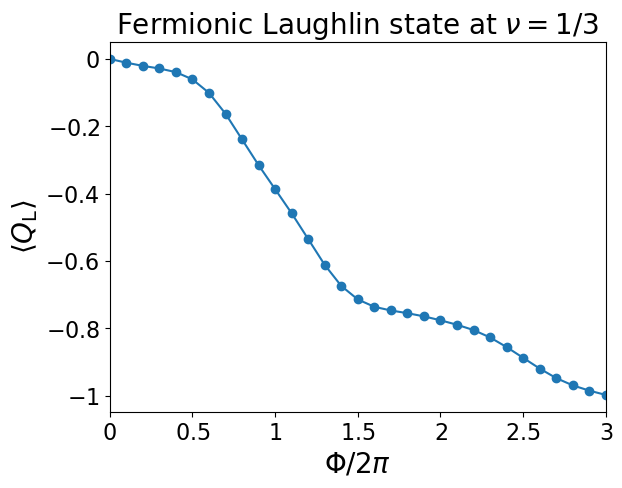

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.plot(data9['phi_ext'], data9['QL']-data9['QL'][0], marker='o')
ax.set_xlabel(r"$\Phi / 2 \pi$", fontsize=20)
ax.set_ylabel(r"$ \langle Q_\mathrm{L} \rangle $", fontsize=20)
ax.set_title(r"Fermionic Laughlin state at $\nu=1/3$", fontsize=20)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.set_xlim([0, 3])
plt.show()

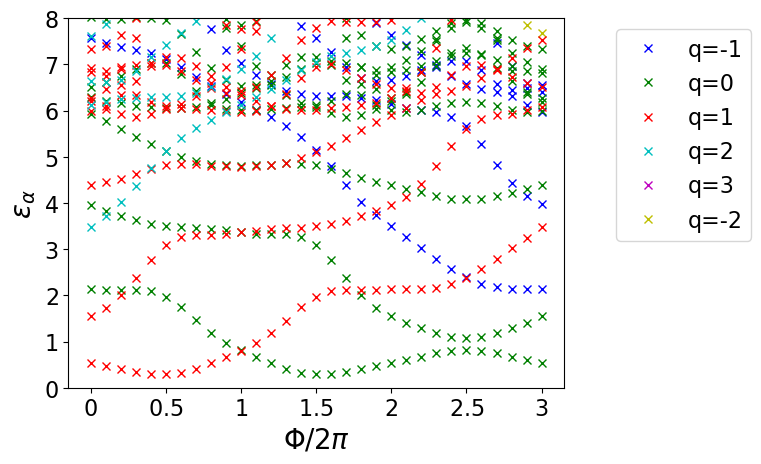

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
color_by_charge = {}
for phi_ext, spectrum in zip(data9['phi_ext'], data9['ent_spectrum']):
    for q, s in spectrum:
        if q > -4:
            q = q[0]
            label = ""
            if q not in color_by_charge:
                label = "q={q:d}".format(q=q)
                color_by_charge[q] = colors[len(color_by_charge) % len(colors)]
            color = color_by_charge[q]
            ax.plot(phi_ext*np.ones(s.shape), s,
                    linestyle='', marker='x', color=color, label=label)
ax.set_xlabel(r"$\Phi / 2 \pi$", fontsize=20)
ax.set_ylabel(r"$ \epsilon_\alpha $", fontsize=20)
ax.set_ylim(0., 8.)
ax.legend(loc='upper right', fontsize=16, bbox_to_anchor=(1.4, 1))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
#ax.set_xlim([0, 3])
plt.show()

# Hofstadter Model

In [95]:
import numpy as np
import random

from tenpy.algorithms import dmrg
from tenpy.networks.mps import MPS

from tenpy.models.model import CouplingMPOModel
from tenpy.networks.site import BosonSite, FermionSite
from tenpy.models.lattice import Square

class ZeroQuadraticModel(CouplingMPOModel):

    def __init__(self, params):
        CouplingMPOModel.__init__(self, params)

    def init_sites(self, params):
        conserve = params.get('conserve', 'N')
        Nmax = params.get('Nmax', 1)
        site = BosonSite(Nmax=Nmax, conserve=conserve)  # conserve=conserve
        return site

    def init_lattice(self, params):
        L_default = (4, 4)
        L = params.get('L', L_default)
        order = params.get('order', 'Cstyle')
        bc_MPS = params.get('bc_MPS', 'infinite')
        bc_x = params.get('bc_x', 'periodic')
        bc_y = params.get('bc_y', 'periodic')
        bc = [bc_x, bc_y]
        site = self.init_sites(params)
        lat = Square(L[0], L[1], site, order=order, bc_MPS=bc_MPS, bc=bc)
        return lat

    def init_terms(self, params):
        nphi_default = (1, 4)
        L_default = (4, 4)

        t = params.get('t', 1)
        nphi = params.get('nphi', nphi_default)
        nphi_2pi = 2 * np.pi * nphi[0] / nphi[1]
        phi_2pi = 2 * np.pi * params.get('phi', 0.0)
        L = params.get('L', L_default)
        _Lx, _Ly = L[0], L[1]

        dx = np.array([1, 0])
        self.add_coupling(-t, 0, 'Bd', 0, 'B', dx, category='tx')
        self.add_coupling(np.conj(-t), 0, 'Bd', 0, 'B', -dx, category='tx*')

        dy = np.array([0, 1])
        ty_phi = -t*np.ones((_Lx, _Ly), dtype=complex)
        ty_phi = self.coupling_strength_add_ext_flux(ty_phi, dy, [0, phi_2pi])
        for ix in range(_Lx):
            ty_phi[ix, :] *= np.exp(1j * ix * nphi_2pi)
        print(f'this is ty_phi = {ty_phi}')
        self.add_coupling(ty_phi, 0, 'Bd', 0, 'B', dy, category = 'ty')
        self.add_coupling(np.conj(ty_phi), 0, 'Bd', 0, 'B', -dy, category = 'ty*')

Reading 'order'='default' for config ZeroQuadraticModel
Reading 'bc_MPS'='infinite' for config ZeroQuadraticModel
Reading 'bc_x'='periodic' for config ZeroQuadraticModel
Reading 'bc_y'='periodic' for config ZeroQuadraticModel
Reading 'conserve'='N' for config ZeroQuadraticModel
Reading 'Nmax'=1 for config ZeroQuadraticModel
Reading 'nphi'=(1, 4) for config ZeroQuadraticModel
Reading 'phi'=0.0 for config ZeroQuadraticModel
this is ty_phi = [[-1.0000000e+00+0.0000000e+00j -1.0000000e+00+0.0000000e+00j
  -1.0000000e+00+0.0000000e+00j -1.0000000e+00+0.0000000e+00j]
 [-6.1232340e-17-1.0000000e+00j -6.1232340e-17-1.0000000e+00j
  -6.1232340e-17-1.0000000e+00j -6.1232340e-17-1.0000000e+00j]
 [ 1.0000000e+00-1.2246468e-16j  1.0000000e+00-1.2246468e-16j
   1.0000000e+00-1.2246468e-16j  1.0000000e+00-1.2246468e-16j]
 [ 1.8369702e-16+1.0000000e+00j  1.8369702e-16+1.0000000e+00j
   1.8369702e-16+1.0000000e+00j  1.8369702e-16+1.0000000e+00j]]
[([('B', 0), ('Bd', 3)], (-1+0j)),
 ([('Bd', 0), ('B', 1

/Users/mathiraja/TeNPy/tenpy/tools/params.py:225: UserWarning: unused options for config ZeroQuadraticModel:
['Jx', 'Jy', 'Lx', 'Ly', 'U', 'filling', 'gauge', 'mod', 'mu']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


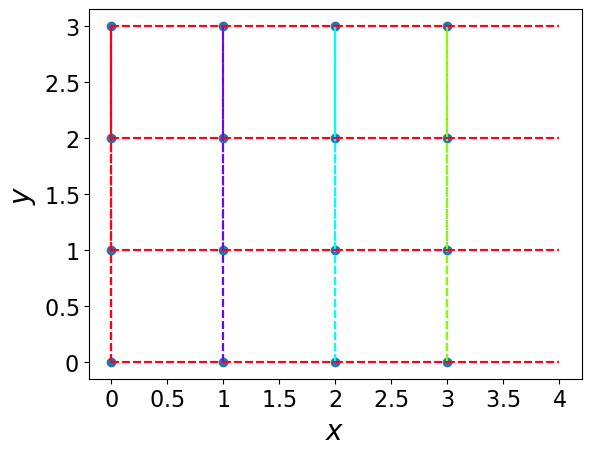

In [96]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

model_params = dict(Lx=4, Ly=4,
                    # mx=,2 my=1,
                    filling=(1, 8), nphi=(1, 4), mod = 'BosHof',
                    Jx=1, Jy=1, mu=0, U=0, Nmax=1,
                    bc_MPS='infinite', bc_x='periodic', bc_y='periodic',
                    conserve='N', order='default', gauge='landau_x', phi = 0.0)


M = ZeroQuadraticModel(model_params)
plt.figure()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$y$", fontsize=20)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
M.lat.plot_sites(ax)
M.coupling_terms['ty'].plot_coupling_terms(ax, M.lat)
M.coupling_terms['tx'].plot_coupling_terms(ax, M.lat)
M.coupling_terms['ty*'].plot_coupling_terms(ax, M.lat)
M.coupling_terms['tx*'].plot_coupling_terms(ax, M.lat)
import pprint
pprint.pprint(list(M.coupling_terms['ty'].to_TermList()))
ax.set_aspect(1.)
plt.show()

In [98]:
import numpy as np
import random

from tenpy.algorithms import dmrg
from tenpy.networks.mps import MPS

from tenpy.models.model import CouplingMPOModel
from tenpy.networks.site import BosonSite, FermionSite
from tenpy.models.lattice import Square

import logging
logging.basicConfig(level=logging.INFO)

#M: Added ent_spectrum
data10 = dict(phi_ext=np.linspace(0, 2.0, 21), QL=[], ent_spectrum=[])

#M: Did not change anything after this except the very last line
model_params = dict(Lx=4, Ly=4,
                    # mx=,2 my=1,
                    filling=(1, 8), nphi=(1, 4), mod = 'BosHof',
                    Jx=1, Jy=1, mu=0, U=0, Nmax=1,
                    bc_MPS='infinite', bc_x='periodic', bc_y='periodic',
                    conserve='N', order='default', gauge='landau_x')

dmrg_params = {
    'mixer': True,  # setting this to True helps to escape local minima
    'mixer_params': {
        'amplitude': 1.e-5,
        'decay': 1.2,
        'disable_after': 30
    },
    'trunc_params': {
        'chi_max': 50,
        'svd_min': 1.e-10,
    },
    'max_E_err': 1.e-8,
    'max_S_err': 1.e-6,
    'max_sweeps': 150,
    'verbose': 1,
    'combine': True
}

L = model_params['Lx'] * model_params['Ly']
fill = model_params['filling'][0] / model_params['filling'][1]
prod_state = np.zeros(L, dtype=int)
prod_state[random.sample(range(L), int(fill*L))] = 1
print(prod_state)

eng = None
QLs = []
for phi in np.linspace(0, 2.0, 21):

    model_params['phi'] = phi
    M = ZeroQuadraticModel(model_params)

    if eng is None:  # first time in the loop
        psi = MPS.from_product_state(M.lat.mps_sites(), prod_state, bc=M.lat.bc_MPS)
        eng = dmrg.TwoSiteDMRGEngine(psi, M, dmrg_params)
    else:
        dmrg_params['mixer'] = False
        eng.init_env(model=M)  # re-initialize
    E, psi = eng.run()
    QL = psi.average_charge(bond=0)[0]
    data10['QL'].append(QL)
    data10['ent_spectrum'].append(psi.entanglement_spectrum(by_charge=True)[0])

[0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
Reading 'order'='default' for config ZeroQuadraticModel
Reading 'bc_MPS'='infinite' for config ZeroQuadraticModel
Reading 'bc_x'='periodic' for config ZeroQuadraticModel
Reading 'bc_y'='periodic' for config ZeroQuadraticModel
Reading 'conserve'='N' for config ZeroQuadraticModel
Reading 'Nmax'=1 for config ZeroQuadraticModel
Reading 'nphi'=(1, 4) for config ZeroQuadraticModel
Reading 'phi'=0.0 for config ZeroQuadraticModel
this is ty_phi = [[-1.0000000e+00+0.0000000e+00j -1.0000000e+00+0.0000000e+00j
  -1.0000000e+00+0.0000000e+00j -1.0000000e+00+0.0000000e+00j]
 [-6.1232340e-17-1.0000000e+00j -6.1232340e-17-1.0000000e+00j
  -6.1232340e-17-1.0000000e+00j -6.1232340e-17-1.0000000e+00j]
 [ 1.0000000e+00-1.2246468e-16j  1.0000000e+00-1.2246468e-16j
   1.0000000e+00-1.2246468e-16j  1.0000000e+00-1.2246468e-16j]
 [ 1.8369702e-16+1.0000000e+00j  1.8369702e-16+1.0000000e+00j
   1.8369702e-16+1.0000000e+00j  1.8369702e-16+1.0000000e+00j]]
Reading 'combine'=True

/Users/mathiraja/TeNPy/tenpy/tools/params.py:225: UserWarning: unused options for config ZeroQuadraticModel:
['Jx', 'Jy', 'Lx', 'Ly', 'U', 'filling', 'gauge', 'mod', 'mu']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/Users/mathiraja/TeNPy/tenpy/networks/mps.py:2771: RuntimeWarning: divide by zero encountered in reciprocal
  S = S**form_diff
/Users/mathiraja/TeNPy/tenpy/algorithms/dmrg.py:1997: UserWarning: H is zero in the given block, nothing to diagonalize.We just return the initial state again.
  warnings.warn("H is zero in the given block, nothing to diagonalize."


Updating environment
.....
sweep 10, age = 528
Energy = -0.3467306356146587, S = nan, norm_err = 1.5e-07
Current memory usage 265968.0 MB, time elapsed: 12.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5822e-07, max_E_trunc = 4.6194e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 1008
Energy = -0.3467309910982355, S = nan, norm_err = 7.4e-08
Current memory usage 266112.0 MB, time elapsed: 21.9 s
Delta E = -3.5548e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.0534e-08, max_E_trunc = 3.0463e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
disable mixer after 30 sweeps, final amplitude 4.21e-08
Updating environment
.....
sweep 30, age = 1488
Energy = -0.3467311516986147, S = 0.6604027761228253, norm_err = 7.3e-14
Current memory usage 266304.0 MB, time elapsed: 29.1 s
Delta E = -1.6060e-08, Delta S = nan (per sweep)
max_trunc_err = 

/Users/mathiraja/TeNPy/tenpy/tools/params.py:225: UserWarning: unused options for config ZeroQuadraticModel:
['Jx', 'Jy', 'Lx', 'Ly', 'U', 'filling', 'gauge', 'mod', 'mu']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Updating environment
.....
sweep 10, age = 2480
Energy = -0.3456201810737163, S = 0.6730782487626639, norm_err = 2.1e-14
Current memory usage 266784.0 MB, time elapsed: 4.0 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 4.3300e-08, max_E_trunc = 3.0500e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 2960
Energy = -0.3456201812206317, S = 0.6730781841891912, norm_err = 2.1e-14
Current memory usage 266928.0 MB, time elapsed: 7.3 s
Delta E = -1.4692e-11, Delta S = -6.4573e-09 (per sweep)
max_trunc_err = 4.3359e-08, max_E_trunc = 3.0535e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 2960, maximum chi = 50
Reading 'explicit_plus_hc'=False for config ZeroQuadraticModel
Reading 'L'=(4, 4) for config ZeroQuadraticModel
Reading 'order'='default' for config ZeroQuadraticModel
Reading 'bc_MPS'='infinite' for config 

/Users/mathiraja/TeNPy/tenpy/tools/params.py:225: UserWarning: unused options for config ZeroQuadraticModel:
['Jx', 'Jy', 'Lx', 'Ly', 'U', 'filling', 'gauge', 'mod', 'mu']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Updating environment
.....
sweep 10, age = 3472
Energy = -0.3426536269562988, S = 0.7099932548921775, norm_err = 3.5e-14
Current memory usage 267088.0 MB, time elapsed: 4.0 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 6.4072e-08, max_E_trunc = 4.3059e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 3952
Energy = -0.3426536272958103, S = 0.7099927140342408, norm_err = 4.6e-14
Current memory usage 267088.0 MB, time elapsed: 7.3 s
Delta E = -3.3951e-11, Delta S = -5.4086e-08 (per sweep)
max_trunc_err = 6.3443e-08, max_E_trunc = 4.2684e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 3952, maximum chi = 50
Reading 'explicit_plus_hc'=False for config ZeroQuadraticModel
Reading 'L'=(4, 4) for config ZeroQuadraticModel
Reading 'order'='default' for config ZeroQuadraticModel
Reading 'bc_MPS'='infinite' for config 

/Users/mathiraja/TeNPy/tenpy/tools/params.py:225: UserWarning: unused options for config ZeroQuadraticModel:
['Jx', 'Jy', 'Lx', 'Ly', 'U', 'filling', 'gauge', 'mod', 'mu']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Updating environment
.....
sweep 10, age = 4464
Energy = -0.3388796508059713, S = 0.7642628652935333, norm_err = 1.1e-12
Current memory usage 267088.0 MB, time elapsed: 4.5 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 1.0410e-07, max_E_trunc = 6.9995e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 4944
Energy = -0.3388796522896840, S = 0.7642612052641689, norm_err = 1.1e-12
Current memory usage 267088.0 MB, time elapsed: 8.0 s
Delta E = -1.4837e-10, Delta S = -1.6600e-07 (per sweep)
max_trunc_err = 1.0378e-07, max_E_trunc = 6.9746e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 4944, maximum chi = 50
Reading 'explicit_plus_hc'=False for config ZeroQuadraticModel
Reading 'L'=(4, 4) for config ZeroQuadraticModel
Reading 'order'='default' for config ZeroQuadraticModel
Reading 'bc_MPS'='infinite' for config 

/Users/mathiraja/TeNPy/tenpy/tools/params.py:225: UserWarning: unused options for config ZeroQuadraticModel:
['Jx', 'Jy', 'Lx', 'Ly', 'U', 'filling', 'gauge', 'mod', 'mu']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Updating environment
.....
sweep 10, age = 5456
Energy = -0.3357567952693543, S = 0.8161677375997411, norm_err = 1.1e-12
Current memory usage 267088.0 MB, time elapsed: 4.4 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 1.6207e-07, max_E_trunc = 1.0791e-06
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 5936
Energy = -0.3357568035172704, S = 0.8161637558145942, norm_err = 1.0e-12
Current memory usage 267088.0 MB, time elapsed: 8.0 s
Delta E = -8.2479e-10, Delta S = -3.9818e-07 (per sweep)
max_trunc_err = 1.6166e-07, max_E_trunc = 1.0680e-06
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 5936, maximum chi = 50
Reading 'explicit_plus_hc'=False for config ZeroQuadraticModel
Reading 'L'=(4, 4) for config ZeroQuadraticModel
Reading 'order'='default' for config ZeroQuadraticModel
Reading 'bc_MPS'='infinite' for config 

/Users/mathiraja/TeNPy/tenpy/tools/params.py:225: UserWarning: unused options for config ZeroQuadraticModel:
['Jx', 'Jy', 'Lx', 'Ly', 'U', 'filling', 'gauge', 'mod', 'mu']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Updating environment
.....
sweep 10, age = 6448
Energy = -0.3345528723813516, S = 0.8379702693994258, norm_err = 1.3e-12
Current memory usage 267088.0 MB, time elapsed: 3.9 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 1.8027e-07, max_E_trunc = 1.1865e-06
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 6928
Energy = -0.3345528725731839, S = 0.8379691010681902, norm_err = 1.5e-12
Current memory usage 267120.0 MB, time elapsed: 7.1 s
Delta E = -1.9183e-11, Delta S = -1.1683e-07 (per sweep)
max_trunc_err = 1.7911e-07, max_E_trunc = 1.1859e-06
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 6928, maximum chi = 50
Reading 'explicit_plus_hc'=False for config ZeroQuadraticModel
Reading 'L'=(4, 4) for config ZeroQuadraticModel
Reading 'order'='default' for config ZeroQuadraticModel
Reading 'bc_MPS'='infinite' for config 

/Users/mathiraja/TeNPy/tenpy/tools/params.py:225: UserWarning: unused options for config ZeroQuadraticModel:
['Jx', 'Jy', 'Lx', 'Ly', 'U', 'filling', 'gauge', 'mod', 'mu']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Updating environment
.....
sweep 10, age = 7440
Energy = -0.3357567953893295, S = 0.8161560454566519, norm_err = 1.2e-12
Current memory usage 267120.0 MB, time elapsed: 4.0 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 1.6042e-07, max_E_trunc = 1.0811e-06
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 7920
Energy = -0.3357567953434852, S = 0.8161561766106752, norm_err = 1.2e-12
Current memory usage 267120.0 MB, time elapsed: 7.2 s
Delta E = 4.5844e-12, Delta S = 1.3115e-08 (per sweep)
max_trunc_err = 1.6026e-07, max_E_trunc = 1.0800e-06
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 7920, maximum chi = 50
Reading 'explicit_plus_hc'=False for config ZeroQuadraticModel
Reading 'L'=(4, 4) for config ZeroQuadraticModel
Reading 'order'='default' for config ZeroQuadraticModel
Reading 'bc_MPS'='infinite' for config Ze

/Users/mathiraja/TeNPy/tenpy/tools/params.py:225: UserWarning: unused options for config ZeroQuadraticModel:
['Jx', 'Jy', 'Lx', 'Ly', 'U', 'filling', 'gauge', 'mod', 'mu']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Updating environment
.....
sweep 10, age = 8432
Energy = -0.3388796492803294, S = 0.7642642109033022, norm_err = 2.5e-13
Current memory usage 267120.0 MB, time elapsed: 3.9 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 1.0779e-07, max_E_trunc = 7.2738e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 8912
Energy = -0.3388796491054222, S = 0.7642647204264381, norm_err = 2.5e-13
Current memory usage 267136.0 MB, time elapsed: 7.2 s
Delta E = 1.7491e-11, Delta S = 5.0952e-08 (per sweep)
max_trunc_err = 1.0787e-07, max_E_trunc = 7.2728e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 8912, maximum chi = 50
Reading 'explicit_plus_hc'=False for config ZeroQuadraticModel
Reading 'L'=(4, 4) for config ZeroQuadraticModel
Reading 'order'='default' for config ZeroQuadraticModel
Reading 'bc_MPS'='infinite' for config Ze

/Users/mathiraja/TeNPy/tenpy/tools/params.py:225: UserWarning: unused options for config ZeroQuadraticModel:
['Jx', 'Jy', 'Lx', 'Ly', 'U', 'filling', 'gauge', 'mod', 'mu']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Updating environment
.....
sweep 10, age = 9424
Energy = -0.3426536256766042, S = 0.7099924597056493, norm_err = 3.7e-14
Current memory usage 267136.0 MB, time elapsed: 3.9 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 6.4736e-08, max_E_trunc = 4.3055e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 9904
Energy = -0.3426536256883281, S = 0.7099926539359118, norm_err = 3.6e-14
Current memory usage 267136.0 MB, time elapsed: 7.1 s
Delta E = -1.1724e-12, Delta S = 1.9423e-08 (per sweep)
max_trunc_err = 6.4745e-08, max_E_trunc = 4.3080e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 9904, maximum chi = 50
Reading 'explicit_plus_hc'=False for config ZeroQuadraticModel
Reading 'L'=(4, 4) for config ZeroQuadraticModel
Reading 'order'='default' for config ZeroQuadraticModel
Reading 'bc_MPS'='infinite' for config Z

/Users/mathiraja/TeNPy/tenpy/tools/params.py:225: UserWarning: unused options for config ZeroQuadraticModel:
['Jx', 'Jy', 'Lx', 'Ly', 'U', 'filling', 'gauge', 'mod', 'mu']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Updating environment
.....
sweep 10, age = 10416
Energy = -0.3456201806900054, S = 0.6730749485097265, norm_err = 3.3e-14
Current memory usage 267136.0 MB, time elapsed: 4.0 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 4.2000e-08, max_E_trunc = 3.0271e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 10896
Energy = -0.3456201806939418, S = 0.6730751180944055, norm_err = 3.1e-14
Current memory usage 267136.0 MB, time elapsed: 7.3 s
Delta E = -3.9364e-13, Delta S = 1.6958e-08 (per sweep)
max_trunc_err = 4.1980e-08, max_E_trunc = 3.0260e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 10896, maximum chi = 50
Reading 'explicit_plus_hc'=False for config ZeroQuadraticModel
Reading 'L'=(4, 4) for config ZeroQuadraticModel
Reading 'order'='default' for config ZeroQuadraticModel
Reading 'bc_MPS'='infinite' for confi

/Users/mathiraja/TeNPy/tenpy/tools/params.py:225: UserWarning: unused options for config ZeroQuadraticModel:
['Jx', 'Jy', 'Lx', 'Ly', 'U', 'filling', 'gauge', 'mod', 'mu']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Updating environment
.....
sweep 10, age = 11408
Energy = -0.3467311629931231, S = 0.6604054178661634, norm_err = 2.7e-14
Current memory usage 267136.0 MB, time elapsed: 3.8 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 3.5078e-08, max_E_trunc = 2.4332e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 11888
Energy = -0.3467311629882488, S = 0.6604055826806736, norm_err = 2.8e-14
Current memory usage 267136.0 MB, time elapsed: 6.9 s
Delta E = 4.8743e-13, Delta S = 1.6481e-08 (per sweep)
max_trunc_err = 3.5060e-08, max_E_trunc = 2.4282e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 11888, maximum chi = 50
Reading 'explicit_plus_hc'=False for config ZeroQuadraticModel
Reading 'L'=(4, 4) for config ZeroQuadraticModel
Reading 'order'='default' for config ZeroQuadraticModel
Reading 'bc_MPS'='infinite' for config

/Users/mathiraja/TeNPy/tenpy/tools/params.py:225: UserWarning: unused options for config ZeroQuadraticModel:
['Jx', 'Jy', 'Lx', 'Ly', 'U', 'filling', 'gauge', 'mod', 'mu']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Updating environment
.....
sweep 10, age = 12400
Energy = -0.3456201751500600, S = 0.6730675312550699, norm_err = 5.6e-14
Current memory usage 267136.0 MB, time elapsed: 4.0 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 4.2050e-08, max_E_trunc = 2.9146e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 12880
Energy = -0.3456201752171637, S = 0.6730675474304810, norm_err = 5.3e-14
Current memory usage 267136.0 MB, time elapsed: 7.4 s
Delta E = -6.7104e-12, Delta S = 1.6175e-09 (per sweep)
max_trunc_err = 4.1581e-08, max_E_trunc = 2.8994e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 12880, maximum chi = 50
Reading 'explicit_plus_hc'=False for config ZeroQuadraticModel
Reading 'L'=(4, 4) for config ZeroQuadraticModel
Reading 'order'='default' for config ZeroQuadraticModel
Reading 'bc_MPS'='infinite' for confi

/Users/mathiraja/TeNPy/tenpy/tools/params.py:225: UserWarning: unused options for config ZeroQuadraticModel:
['Jx', 'Jy', 'Lx', 'Ly', 'U', 'filling', 'gauge', 'mod', 'mu']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Updating environment
.....
sweep 10, age = 13392
Energy = -0.3426536250050276, S = 0.7099863442483316, norm_err = 2.0e-13
Current memory usage 267136.0 MB, time elapsed: 3.9 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 6.3688e-08, max_E_trunc = 4.2963e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 13872
Energy = -0.3426536253073209, S = 0.7099858714454874, norm_err = 1.6e-13
Current memory usage 267136.0 MB, time elapsed: 6.9 s
Delta E = -3.0229e-11, Delta S = -4.7280e-08 (per sweep)
max_trunc_err = 6.3079e-08, max_E_trunc = 4.2653e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 13872, maximum chi = 50
Reading 'explicit_plus_hc'=False for config ZeroQuadraticModel
Reading 'L'=(4, 4) for config ZeroQuadraticModel
Reading 'order'='default' for config ZeroQuadraticModel
Reading 'bc_MPS'='infinite' for conf

/Users/mathiraja/TeNPy/tenpy/tools/params.py:225: UserWarning: unused options for config ZeroQuadraticModel:
['Jx', 'Jy', 'Lx', 'Ly', 'U', 'filling', 'gauge', 'mod', 'mu']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Updating environment
.....
sweep 10, age = 14384
Energy = -0.3388796506076801, S = 0.7642609772864438, norm_err = 7.6e-13
Current memory usage 267136.0 MB, time elapsed: 4.0 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 9.9907e-08, max_E_trunc = 6.7730e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 14864
Energy = -0.3388796513395391, S = 0.7642595789573035, norm_err = 6.9e-13
Current memory usage 267136.0 MB, time elapsed: 7.2 s
Delta E = -7.3186e-11, Delta S = -1.3983e-07 (per sweep)
max_trunc_err = 9.9334e-08, max_E_trunc = 6.7297e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 14864, maximum chi = 50
Reading 'explicit_plus_hc'=False for config ZeroQuadraticModel
Reading 'L'=(4, 4) for config ZeroQuadraticModel
Reading 'order'='default' for config ZeroQuadraticModel
Reading 'bc_MPS'='infinite' for conf

/Users/mathiraja/TeNPy/tenpy/tools/params.py:225: UserWarning: unused options for config ZeroQuadraticModel:
['Jx', 'Jy', 'Lx', 'Ly', 'U', 'filling', 'gauge', 'mod', 'mu']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Updating environment
.....
sweep 10, age = 15376
Energy = -0.3357567818027292, S = 0.8161645551855595, norm_err = 9.8e-13
Current memory usage 267136.0 MB, time elapsed: 4.5 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 1.8029e-07, max_E_trunc = 1.1722e-06
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 15856
Energy = -0.3357567837902309, S = 0.8161617564758146, norm_err = 5.5e-13
Current memory usage 267136.0 MB, time elapsed: 8.0 s
Delta E = -1.9875e-10, Delta S = -2.7987e-07 (per sweep)
max_trunc_err = 1.7999e-07, max_E_trunc = 1.1704e-06
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 15856, maximum chi = 50
Reading 'explicit_plus_hc'=False for config ZeroQuadraticModel
Reading 'L'=(4, 4) for config ZeroQuadraticModel
Reading 'order'='default' for config ZeroQuadraticModel
Reading 'bc_MPS'='infinite' for conf

/Users/mathiraja/TeNPy/tenpy/tools/params.py:225: UserWarning: unused options for config ZeroQuadraticModel:
['Jx', 'Jy', 'Lx', 'Ly', 'U', 'filling', 'gauge', 'mod', 'mu']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Updating environment
.....
sweep 10, age = 16368
Energy = -0.3345528823193433, S = 0.8379725636741930, norm_err = 2.4e-12
Current memory usage 267136.0 MB, time elapsed: 4.1 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 1.8050e-07, max_E_trunc = 1.1614e-06
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 16848
Energy = -0.3345528827682642, S = 0.8379736063793453, norm_err = 2.3e-12
Current memory usage 267136.0 MB, time elapsed: 7.4 s
Delta E = -4.4892e-11, Delta S = 1.0427e-07 (per sweep)
max_trunc_err = 1.8111e-07, max_E_trunc = 1.1613e-06
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 16848, maximum chi = 50
Reading 'explicit_plus_hc'=False for config ZeroQuadraticModel
Reading 'L'=(4, 4) for config ZeroQuadraticModel
Reading 'order'='default' for config ZeroQuadraticModel
Reading 'bc_MPS'='infinite' for confi

/Users/mathiraja/TeNPy/tenpy/tools/params.py:225: UserWarning: unused options for config ZeroQuadraticModel:
['Jx', 'Jy', 'Lx', 'Ly', 'U', 'filling', 'gauge', 'mod', 'mu']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Updating environment
.....
sweep 10, age = 17360
Energy = -0.3357567964535519, S = 0.8161579034228670, norm_err = 1.7e-12
Current memory usage 267136.0 MB, time elapsed: 4.0 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 1.6082e-07, max_E_trunc = 1.0834e-06
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 17840
Energy = -0.3357567964017676, S = 0.8161580602757776, norm_err = 1.7e-12
Current memory usage 267136.0 MB, time elapsed: 7.3 s
Delta E = 5.1784e-12, Delta S = 1.5685e-08 (per sweep)
max_trunc_err = 1.6064e-07, max_E_trunc = 1.0820e-06
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 17840, maximum chi = 50
Reading 'explicit_plus_hc'=False for config ZeroQuadraticModel
Reading 'L'=(4, 4) for config ZeroQuadraticModel
Reading 'order'='default' for config ZeroQuadraticModel
Reading 'bc_MPS'='infinite' for config

/Users/mathiraja/TeNPy/tenpy/tools/params.py:225: UserWarning: unused options for config ZeroQuadraticModel:
['Jx', 'Jy', 'Lx', 'Ly', 'U', 'filling', 'gauge', 'mod', 'mu']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Updating environment
.....
sweep 10, age = 18352
Energy = -0.3388796464056156, S = 0.7642639453857635, norm_err = 6.9e-13
Current memory usage 267136.0 MB, time elapsed: 4.1 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 1.0874e-07, max_E_trunc = 7.3314e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 18832
Energy = -0.3388796463198389, S = 0.7642643126425689, norm_err = 6.8e-13
Current memory usage 267136.0 MB, time elapsed: 7.3 s
Delta E = 8.5777e-12, Delta S = 3.6726e-08 (per sweep)
max_trunc_err = 1.0894e-07, max_E_trunc = 7.3522e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 18832, maximum chi = 50
Reading 'explicit_plus_hc'=False for config ZeroQuadraticModel
Reading 'L'=(4, 4) for config ZeroQuadraticModel
Reading 'order'='default' for config ZeroQuadraticModel
Reading 'bc_MPS'='infinite' for config

/Users/mathiraja/TeNPy/tenpy/tools/params.py:225: UserWarning: unused options for config ZeroQuadraticModel:
['Jx', 'Jy', 'Lx', 'Ly', 'U', 'filling', 'gauge', 'mod', 'mu']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Updating environment
.....
sweep 10, age = 19344
Energy = -0.3426536237386131, S = 0.7099861701552361, norm_err = 1.8e-13
Current memory usage 267136.0 MB, time elapsed: 3.8 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 6.4585e-08, max_E_trunc = 4.2763e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 19824
Energy = -0.3426536237073208, S = 0.7099863372699757, norm_err = 1.9e-13
Current memory usage 267136.0 MB, time elapsed: 7.0 s
Delta E = 3.1292e-12, Delta S = 1.6711e-08 (per sweep)
max_trunc_err = 6.4652e-08, max_E_trunc = 4.2818e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 19824, maximum chi = 50
Reading 'explicit_plus_hc'=False for config ZeroQuadraticModel
Reading 'L'=(4, 4) for config ZeroQuadraticModel
Reading 'order'='default' for config ZeroQuadraticModel
Reading 'bc_MPS'='infinite' for config

/Users/mathiraja/TeNPy/tenpy/tools/params.py:225: UserWarning: unused options for config ZeroQuadraticModel:
['Jx', 'Jy', 'Lx', 'Ly', 'U', 'filling', 'gauge', 'mod', 'mu']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Updating environment
.....
sweep 10, age = 20336
Energy = -0.3456201799976952, S = 0.6730714970423628, norm_err = 1.3e-13
Current memory usage 267136.0 MB, time elapsed: 4.4 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 4.2089e-08, max_E_trunc = 3.0334e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 20816
Energy = -0.3456201799587291, S = 0.6730721415785184, norm_err = 1.3e-13
Current memory usage 267136.0 MB, time elapsed: 7.9 s
Delta E = 3.8966e-12, Delta S = 6.4454e-08 (per sweep)
max_trunc_err = 4.2210e-08, max_E_trunc = 3.0405e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 20816, maximum chi = 50
Reading 'explicit_plus_hc'=False for config ZeroQuadraticModel
Reading 'L'=(4, 4) for config ZeroQuadraticModel
Reading 'order'='default' for config ZeroQuadraticModel
Reading 'bc_MPS'='infinite' for config

/Users/mathiraja/TeNPy/tenpy/tools/params.py:225: UserWarning: unused options for config ZeroQuadraticModel:
['Jx', 'Jy', 'Lx', 'Ly', 'U', 'filling', 'gauge', 'mod', 'mu']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Updating environment
.....
sweep 10, age = 21328
Energy = -0.3467311623834632, S = 0.6603997780861969, norm_err = 1.0e-13
Current memory usage 267136.0 MB, time elapsed: 4.1 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 3.5022e-08, max_E_trunc = 2.4468e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 21808
Energy = -0.3467311622245575, S = 0.6604004786617779, norm_err = 1.1e-13
Current memory usage 267168.0 MB, time elapsed: 7.2 s
Delta E = 1.5891e-11, Delta S = 7.0058e-08 (per sweep)
max_trunc_err = 3.4925e-08, max_E_trunc = 2.4389e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 21808, maximum chi = 50


In [76]:
print(data10['QL'])

[0.15405924908281046]


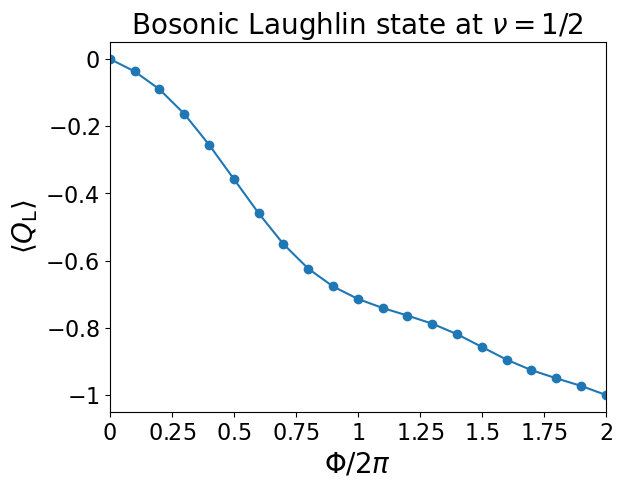

In [99]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.plot(data10['phi_ext'], data10['QL']-data10['QL'][0], marker='o')
ax.set_xlabel(r"$\Phi / 2 \pi$", fontsize=20)
ax.set_ylabel(r"$ \langle Q_\mathrm{L} \rangle $", fontsize=20)
ax.set_title(r"Bosonic Laughlin state at $\nu=1/2$", fontsize=20)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.set_xlim([0, 2])
plt.show()

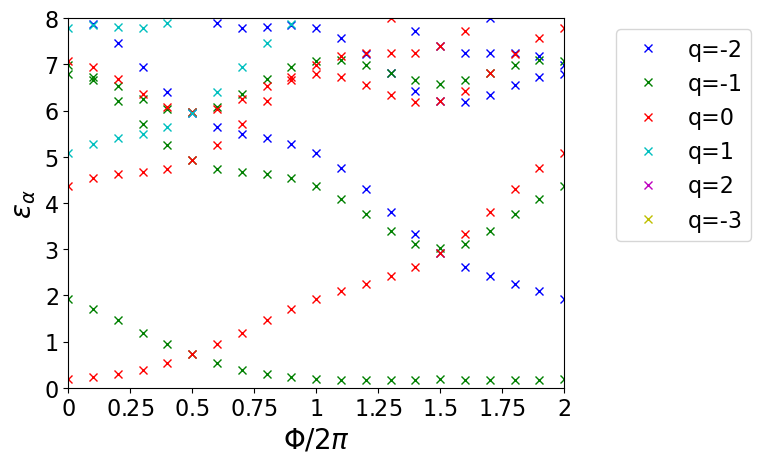

In [101]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
color_by_charge = {}
for phi_ext, spectrum in zip(data10['phi_ext'], data10['ent_spectrum']):
    for q, s in spectrum:
        if q > -4:
            q = q[0]
            label = ""
            if q not in color_by_charge:
                label = "q={q:d}".format(q=q)
                color_by_charge[q] = colors[len(color_by_charge) % len(colors)]
            color = color_by_charge[q]
            ax.plot(phi_ext*np.ones(s.shape), s,
                    linestyle='', marker='x', color=color, label=label)
ax.set_xlabel(r"$\Phi / 2 \pi$", fontsize=20)
ax.set_ylabel(r"$ \epsilon_\alpha $", fontsize=20)
ax.set_ylim(0., 8.)
ax.legend(loc='upper right', fontsize=16, bbox_to_anchor=(1.4, 1))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.set_xlim([0, 2])
plt.show()